In [ ]:
import pandas as pd


### Zadanie #8
Proszę utworzyć dataframe  z https://covid19.who.int/WHO-COVID-19-global-data.csv  a następnie złączyć je z danymi z pliku https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv  w celu uzyskania informacji o kontynencie na którym leży kraj. Tutaj uwaga, trzeba zobaczyć co tam się dzieje w danych opisujących przynależność kraju do kontynentu.
Pogrupować dane według dnia i kontynentu, aby znaleźć sumaryczną liczbę zachorowań i zgonów (wizualizacja w załączniku covid1.png)
Obliczyć średnią  14-dniową zachorowań dla Polski oraz Niemiec (wizualizacja w załączniku covid2.png)
Powodzenia!

In [ ]:
df1 = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")

In [ ]:
df1

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
177745,2022-01-17,ZW,Zimbabwe,AFRO,144,226078,4,5247
177746,2022-01-18,ZW,Zimbabwe,AFRO,382,226460,11,5258
177747,2022-01-19,ZW,Zimbabwe,AFRO,427,226887,8,5266
177748,2022-01-20,ZW,Zimbabwe,AFRO,0,226887,0,5266


In [ ]:
df1[df1.Country_code.isna()].Country.value_counts()

Namibia    750
Name: Country, dtype: int64

In [ ]:
#uzupełnienie krótkiego kodu dla Namibii
df1.loc[df1.Country == "Namibia","Country_code"]="NA"

In [ ]:
#kontynenty
df2 = pd.read_csv("https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv")

In [ ]:
df2

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN


In [ ]:
df2[df2.Two_Letter_Country_Code.isna()]

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
152,Africa,AF,"Namibia, Republic of",NaN,NAM,516.0


In [ ]:
df2[df2.Two_Letter_Country_Code=='NA']

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number


In [ ]:
#poprawka dla Namibii w drugim zbiorze
df2.loc[152, "Two_Letter_Country_Code"]="NA"

In [ ]:
df2[df2.Two_Letter_Country_Code.isna()]

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number


In [ ]:
#poprawka - w 2 pliku trzy kraje mają ten sam kod
df1.loc[df1.Country.isin( ["Sint Eustatius","Bonaire", "Saba" ]), "Country_code"] = "BQ"

In [ ]:
#złączenie lewe po kodzie dwuznakowym
df_res = pd.merge(df1, df2, how="left", left_on="Country_code", right_on="Two_Letter_Country_Code", indicator=True)

In [ ]:
df_res[df_res._merge == "left_only"].groupby("Country").size()

Country
Kosovo[1]    750
Other        750
dtype: int64

In [ ]:
#grupowanie
df_res.groupby(["Date_reported","Continent_Name"] )[["Date_reported", "Continent_Name", "New_cases", "New_deaths"]].agg("sum")

New_cases  New_deaths
Date_reported Continent_Name                       
2020-01-03    Africa                  0           0
              Asia                    0           0
              Europe                  0           0
              North America           0           0
              Oceania                 0           0
...                                 ...         ...
2022-01-21    Asia               684446        2029
              Europe            1513605        3120
              North America      888592        3666
              Oceania             46031          55
              South America      463844         947

[4500 rows x 2 columns]

In [ ]:
#druga część zadania

In [ ]:
df1.Date_reported = pd.to_datetime(df1.Date_reported, format="%Y-%m-%d")

In [ ]:
df1.set_index("Date_reported", inplace=True)

In [ ]:
df_temp=df1[df1.Country.isin(["Germany","Poland"])].groupby("Country").resample("14D").mean()

In [ ]:
df_temp

New_cases  ...  Cumulative_deaths
Country Date_reported                ...                   
Germany 2020-01-03         0.000000  ...           0.000000
        2020-01-17         0.285714  ...           0.000000
        2020-01-31         0.785714  ...           0.000000
        2020-02-14         0.428571  ...           0.000000
        2020-02-28       110.428571  ...           0.500000
...                             ...  ...                ...
Poland  2021-11-19     22601.357143  ...       82293.000000
        2021-12-03     21925.357143  ...       87493.285714
        2021-12-17     13656.571429  ...       93407.071429
        2021-12-31     12201.857143  ...       99077.642857
        2022-01-14     22224.000000  ...      102686.000000

[108 rows x 4 columns]

In [ ]:
pd.pivot_table(df_temp, index="Date_reported", values="New_cases", columns="Country")

Country,Germany,Poland
Date_reported,,
2020-01-03,0.000000,0.000000
2020-01-17,0.285714,0.000000
2020-01-31,0.785714,0.000000
2020-02-14,0.428571,0.000000
2020-02-28,110.428571,2.214286
2020-03-13,2495.785714,72.857143
2020-03-27,5121.000000,296.714286
2020-04-10,2846.000000,354.571429
2020-04-24,1288.928571,326.500000


### Zadanie #10
Pod adresem https://bit.ly/2K8JOur mamy dane z ogłoszeń na otomoto.pl (uwaga na znak separatora - sprawdzić!).
 Jest kolumna „Wyposażenie”, która zawiera elementy (oddzielone znakiem
pionowej kreski (pipeline) ) wchodzące w skład wyposażenia samochodu z
ogłoszenia. Proszę przekonwertować dane do postaci widocznej na dole
załączonej grafiki, gdzie każdy z elementów wyposażenia będzie oddzielną
 kolumną z wartościami True/False (True=dane wyposażenie jest dostępne,
False=nie ma danego wyposażenia).
Powodzenia!

In [ ]:
df_moto = pd.read_csv("https://bit.ly/2K8JOur", sep="\t")

In [ ]:
df_moto.head()

,ID,Link,Nazwa,Cena,Lokalizacja,Rocznik,Przebieg,Paliwo,Nadwozie,VAT,Do negocjacji,Oferta od,Marka pojazdu,Model pojazdu,Wersja,Kategoria,Napęd,Moc,Skrzynia biegów,Typ,Liczba drzwi,Liczba miejsc,Kolor,Perłowy,Kraj pochodzenia,Pierwsza rejestracja,Zarejestrowany w Polsce,Bezwypadkowy,Serwisowany w ASO,Stan,Pierwszy właściciel,Metalik,Możliwość finansowania,VIN,Pojemność skokowa,Wyposażenie
0,6067520775,https://www.otomoto.pl/oferta/skoda-rapid-kraj...,Škoda RAPID,38200PLN,"Tarnów, Małopolskie",2016,83 900 km,Benzyna+LPG,Kompakt,TAK,TAK,Osoby prywatnej,Škoda,RAPID,?,Osobowe,Na przednie koła,90 KM,Manualna,Kompakt,5,5,Srebrny,?,Polska,04/04/2017,Tak,Tak,Tak,Używane,?,Tak,?,?,1 197 cm3,ABS|ELEKTRYCZNIE USTAWIANE LUSTERKA|PODUSZKA P...
1,6065070977,https://www.otomoto.pl/oferta/volkswagen-golf-...,Volkswagen Golf VII,100810PLN,"Pabianicka 119/131 - 93-490 Łódź, Łódzkie (Pol...",2019,1 km,Benzyna,Kompakt,TAK,NIE,Firmy,Volkswagen,Golf,VII (2012-),Osobowe,Na przednie koła,150 KM,"Automatyczna dwusprzęgłowa (DCT, DSG)",Kompakt,5,5,Srebrny,?,Polska,?,?,Tak,?,Nowe,?,Tak,Tak,?,1 500 cm3,ABS|ALUFELGI|CZUJNIK DESZCZU|ELEKTRYCZNE SZYBY...
2,6064956763,https://www.otomoto.pl/oferta/volkswagen-golf-...,Volkswagen Golf VII,85260PLN,"Pabianicka 119/131 - 93-490 Łódź, Łódzkie (Pol...",2019,1 km,Benzyna,Kompakt,TAK,NIE,Firmy,Volkswagen,Golf,VII (2012-),Osobowe,Na przednie koła,130 KM,Manualna,Kompakt,5,5,Szary,?,Polska,?,?,Tak,?,Nowe,?,Tak,Tak,?,1 500 cm3,ABS|ALUFELGI|CZUJNIK DESZCZU|ELEKTRYCZNIE USTA...
3,6067520748,https://www.otomoto.pl/oferta/toyota-auris-hyb...,Toyota Auris II,55300PLN,"Kalisz, Wielkopolskie",2016,103 000 km,Hybryda,Kombi,NIE,NIE,Osoby prywatnej,Toyota,Auris,II (2012-),Osobowe,Na przednie koła,136 KM,Automatyczna bezstopniowa (CVT),Kombi,4,5,Szary,?,Holandia,?,?,Tak,Tak,Używane,?,Tak,?,?,1 800 cm3,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
4,6061054283,https://www.otomoto.pl/oferta/volkswagen-t-roc...,Volkswagen T-Roc,107820PLN,"Pabianicka 119/131 - 93-490 Łódź, Łódzkie (Pol...",2019,1 km,Benzyna,SUV,TAK,NIE,Firmy,Volkswagen,T-Roc,?,Osobowe,Na przednie koła,150 KM,Manualna,SUV,5,5,Biały,?,Polska,?,?,Tak,?,Nowe,?,?,Tak,?,1 500 cm3,ABS|ALUFELGI|CZUJNIK DESZCZU|ELEKTRYCZNIE USTA...


In [ ]:
def str_to_dict(x):
  return {e:True for e in str(x).split("|") }
  

In [ ]:
str_to_dict("ABS|ALUFELGI|CZUJNIK DESZCZU|ELEKTRYCZNE SZYBY")

{'ABS': True,
 'ALUFELGI': True,
 'CZUJNIK DESZCZU': True,
 'ELEKTRYCZNE SZYBY': True}

In [ ]:
#split do słownika, apply(pd.Series) i uzupełnienie wartości nan 
df_moto["Wyposażenie"].apply(str_to_dict).apply(pd.Series).fillna(False)

,ABS,ELEKTRYCZNIE USTAWIANE LUSTERKA,PODUSZKA POWIETRZNA PASAŻERA,ALARM,BLUETOOTH,ESP (STABILIZACJA TORU JAZDY),ISOFIX,KURTYNY POWIETRZNE,ŚWIATŁA DO JAZDY DZIENNEJ,CENTRALNY ZAMEK,IMMOBILIZER,RADIO FABRYCZNE,ALUFELGI,CZUJNIKI PARKOWANIA TYLNE,GNIAZDO AUX,KLIMATYZACJA MANUALNA,PODGRZEWANE LUSTERKA BOCZNE,ŚWIATŁA PRZECIWMGIELNE,ELEKTRYCZNE SZYBY PRZEDNIE,PODUSZKA POWIETRZNA KIEROWCY,WSPOMAGANIE KIEROWNICY,ASR (KONTROLA TRAKCJI),ELEKTRYCZNE SZYBY TYLNE,GNIAZDO USB,KOMPUTER POKŁADOWY,SYSTEM START-STOP,WIELOFUNKCYJNA KIEROWNICA,CZUJNIK DESZCZU,PODUSZKI BOCZNE TYLNE,ASYSTENT PARKOWANIA,CZUJNIK MARTWEGO POLA,ELEKTROCHROMATYCZNE LUSTERKO WSTECZNE,CZUJNIKI PARKOWANIA PRZEDNIE,KLIMATYZACJA AUTOMATYCZNA,PODGRZEWANA PRZEDNIA SZYBA,NAWIGACJA GPS,ŚWIATŁA LED,CZUJNIK ZMIERZCHU,ŁOPATKI ZMIANY BIEGÓW,KLIMATYZACJA DWUSTREFOWA,PODGRZEWANE PRZEDNIE SIEDZENIA,PODUSZKI BOCZNE PRZEDNIE,TEMPOMAT AKTYWNY,ELEKTROCHROMATYCZNE LUSTERKA BOCZNE,GNIAZDO SD,MP3,CD,RELINGI DACHOWE,TEMPOMAT,DACH PANORAMICZNY,KAMERA COFANIA,ŚWIATŁA XENONOWE,OGRANICZNIK PRĘDKOŚCI,PODUSZKA POWIETRZNA CHRONIĄCA KOLANA,PRZYCIEMNIANE SZYBY,TAPICERKA WELUROWA,ELEKTRYCZNIE USTAWIANE FOTELE,ASYSTENT PASA RUCHU,TAPICERKA SKÓRZANA,ODTWARZACZ DVD,ZMIENIARKA CD,HAK,OGRZEWANIE POSTOJOWE,PODGRZEWANE TYLNE SIEDZENIA,REGULOWANE ZAWIESZENIE,SZYBERDACH,KLIMATYZACJA CZTEROSTREFOWA,nan,TUNER TV,HUD (WYŚWIETLACZ PRZEZIERNY),RADIO NIEFABRYCZNE
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,True,True,True,True,True,False,False,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,True,True,True,True,True,True,False,False,True,True,True,True,True,False,False,True,False,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,False,True,True,False,True,True,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,False,False,False,False,True,True,False,True,True,True,True,False,False,True,True,False,True,True,True,False,True,True,False,True,True,True,False,True,False,False,True,False,False,True,False,False,False,Fals

### Zadanie nr #9
1. Pobrać plik z https://drive.google.com/file/d/1tkVHzfGNIvwOG6JNR-IsvvMXPj_LTCmQ/view?usp=sharing
2. Rozpakować. Dane zawierają dane na temat cen laptopów z Komputronik.pl
3. W pliku CSV zobaczycie m.in. kolumny:
    - id - ID modelu
    - name - nazwa modelu
    - date - data na którą pobrano informacje o cenie
    - price - cena modelu na datę z kolumny "date"
4. Znaleźć 10 modeli, gdzie występuje największa roznica w cenie i pokazać wartosc min/max, roznice min-max oraz procentowa wartosc roznicy min-max w stosunku do ceny mininalnej (przykład dataframe w załączniku)
5. Dla znalezionych w pkt 4. modeli laptopów wykonać:
    - wykres liniowy prezentujący zmianę ceny
    - wykres prezentujący zmianę średniej ceny 7-dniowej jako wykres słupkowy
Powodzenia!


In [ ]:
df

/content


In [ ]:
df_komp = pd.read_csv("komputronik-out.csv.zip", compression="zip")

In [ ]:
df_komp

,id,name,code_foreign,date,price,avail,is_buyable
0,687618,Lenovo Ideapad 3-15IIL (81WE0048PB),81WE0048PB,2021-08-25 00:00:00,2399.0,Dostępny w salonach.,True
1,723216,HP Pavilion 15-eh0040nw (3Y355EA) Niebieski,3Y355EA,2021-08-25 00:00:00,2949.0,Dostępny w salonach.,True
2,723217,HP Pavilion 15-eh0041nw (3Y356EA) Srebrny,3Y356EA,2021-08-25 00:00:00,2899.0,Dostępny w salonach.,True
3,716796,DELL Vostro 3500 [N3004VN3500EMEA01_2105],N3004VN3500EMEA01_2105,2021-08-25 00:00:00,3049.0,Dostępny w salonach.,True
4,722758,ASUS ZenBook UX425EA-KC192T - Szary,90NB0SM1-M07820,2021-08-25 00:00:00,4899.0,Dostępny w salonach.,True
...,...,...,...,...,...,...,...
6747491,738283,ASUS X515JA-BQ1575 Szary - 512GB M.2 PCIe + HD...,90NB0SR1-M29810|5M21TW10P,2021-12-31 19:00:00,3549.0,NaN,False
6747492,720677,Lenovo ThinkBook 14-ITL G2 (20VD000BPB) - 512G...,20VD000BPB|10M2,2021-12-31 19:00:00,3799.0,NaN,False
6747493,738744,Asus ExpertBook B1500CEAE-BQ0087T - 500GB M.2 ...,90NX0441-M02980|5M21T16,2021-12-31 19:00:00,3299.0,NaN,False
6747494,701818,ASUS VivoBook S15 S533JQ-BQ014T - Biały - 512G...,S533JQ-BQ014T|10M2,2021-12-31 19:00:00,4099.0,NaN,False


In [ ]:
dfg = df_komp.groupby("id")

In [ ]:
import numpy as np

In [ ]:
def diff(x):
  return np.max(x) - np.min(x)

In [ ]:
def diff_perc(x):
  return (np.max(x) - np.min(x)) / np.min(x) * 100

In [ ]:
df_res=dfg.agg({
    "price" : [min, max, diff, diff_perc]
})

In [ ]:
df_res.columns

MultiIndex([('price',       'min'),
            ('price',       'max'),
            ('price',      'diff'),
            ('price', 'diff_perc')],
           )

In [ ]:
df_res = df_res.nlargest(10, ('price', 'diff'))

In [ ]:
df_komp.date= pd.to_datetime(df_komp.date, format="%Y-%m-%d")

In [ ]:
df_komp.set_index("date", inplace=True)

In [ ]:
import matplotlib.pyplot as plt


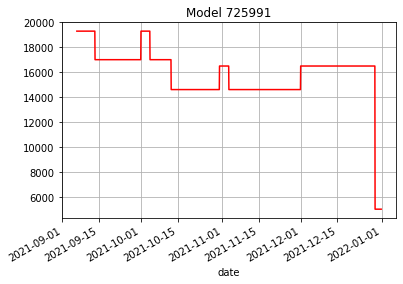

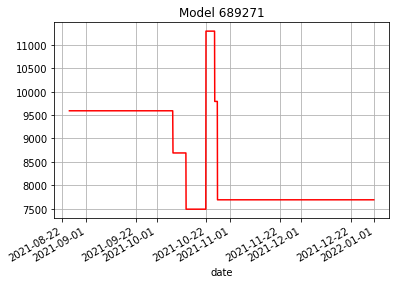

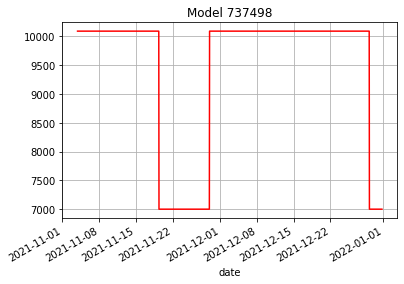

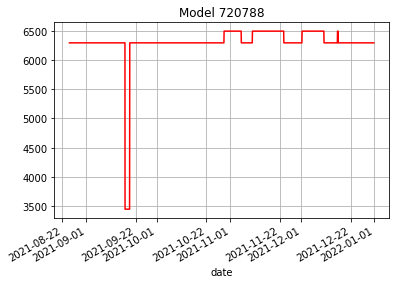

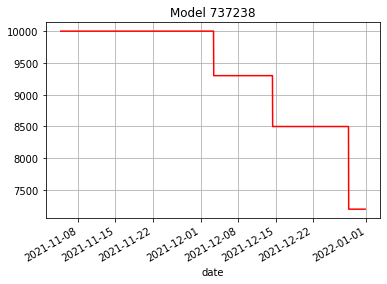

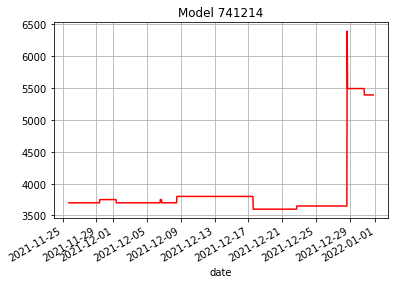

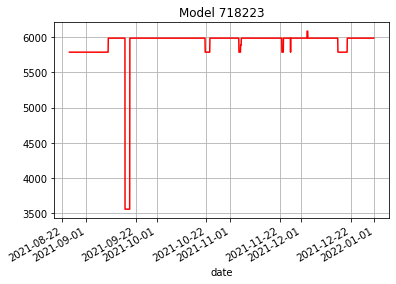

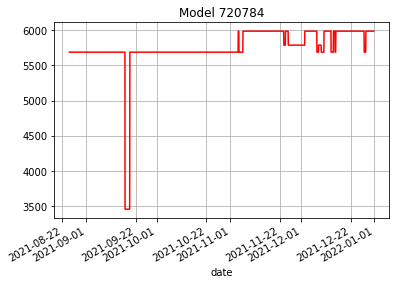

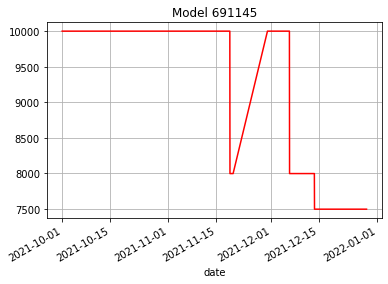

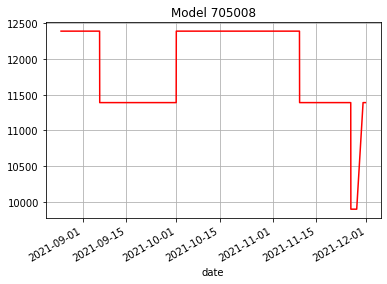

<Figure size 432x288 with 0 Axes>

In [ ]:
#zmiana ceny dla 10 modeli
for x in df_res.index:
  df_komp[df_komp.id == x].price.plot(grid=True, color="red")
  plt.title("Model {}".format(x))
  plt.figure()

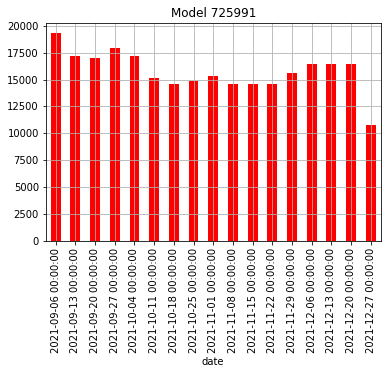

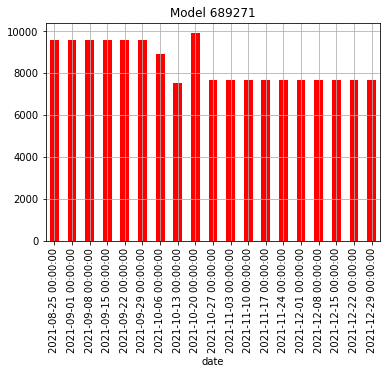

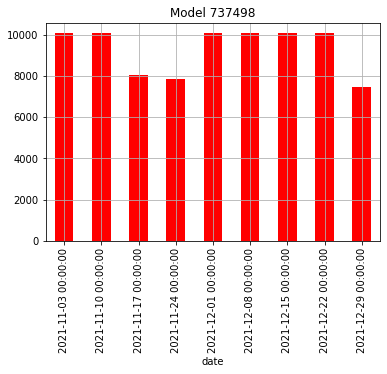

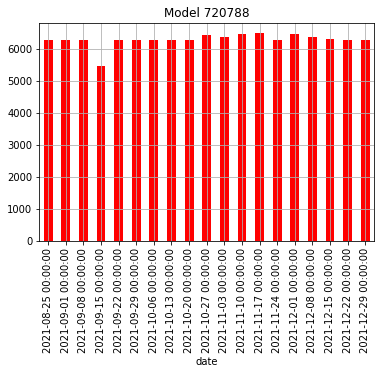

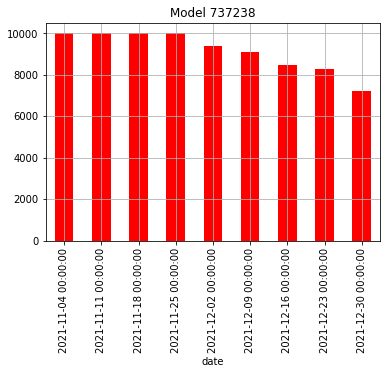

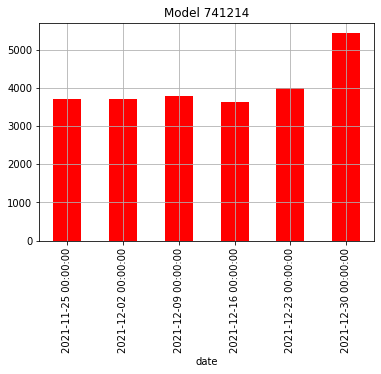

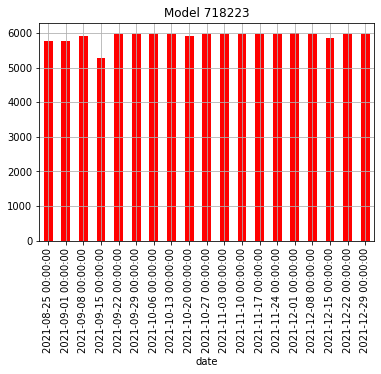

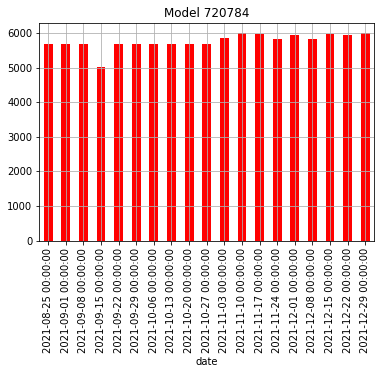

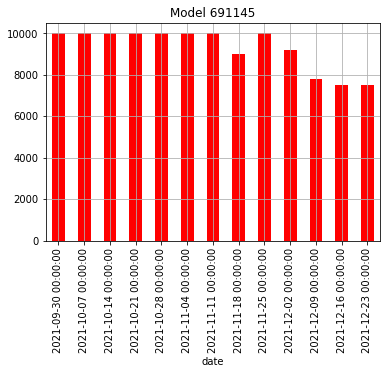

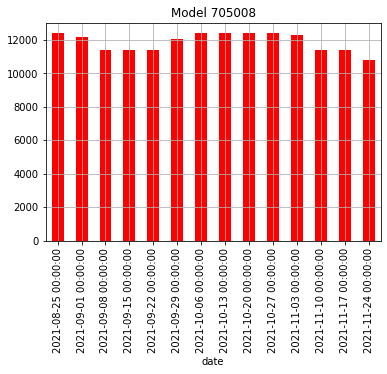

<Figure size 432x288 with 0 Axes>

In [ ]:
#średnia 7dniowa dla 10 modeli
for x in df_res.index:
  df_komp[df_komp.id == x].price.resample("7D").mean().plot(grid=True, color="red", kind="bar")
  plt.title("Model {}".format(x))
  plt.figure()